This notebook explains our design decisions for simulating stochastic dynamical systems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from kalman import LDSNet

# Weiner Process

Describes a stochastic process $W$ which is driven by noise $w$ and governed by

$$dW/dt=v$$

The process is characterized $W(t+\Delta t)-W(t)\sim\mathcal{N}(0, \Delta t)$ (i.e., normally-distributed with mean 0 and variance $\Delta t$.

Discretize the stochastic differential equation SDE by chopping up time into $\Delta t$-sized bins and apply the Euler step

\begin{align}
\frac{W_{t+\Delta t}-W_t}{\Delta t} &= v_t \\
W_{t+\Delta t} &= W_t + \Delta tv_t \\
\end{align}

So that $W_{t+\Delta t}-W_t~\sim\mathcal{N}(0, \Delta t)$, we'll need to set $v_t~\sim\mathcal{N}\left(0, \frac{1}{\Delta t}\right)$

As an alternative, we could use the update $W_{t+\Delta t} = W_t + \sqrt{\Delta t}\tilde{v}_t$ where $\tilde{v}_t\sim\mathcal{N}(0, 1)$


In [6]:
T = 1
Q = 1 # Target variance per unit time
dts = [1, 0.5, 0.1, 0.05, 0.01][::-1]
runs = 100000
data = {}
for dt in dts:
    N = int(np.round(T/dt))
    dW = np.random.randn(runs, N)*np.sqrt(dt)*np.sqrt(Q)
    W = np.zeros((runs, N+1))
    W[:, 1:] = np.cumsum(dW, axis=1)
    data[dt] = W

Showing a sample paths for each dt

Text(0,0.5,'W')

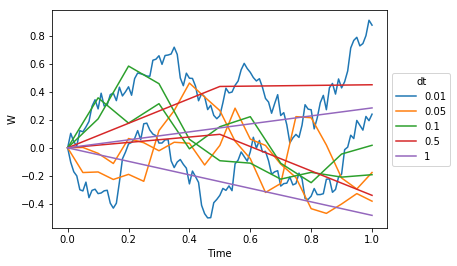

In [7]:
# plot trajectories
N_PLOT = 2
for dt in dts:
    N = int(np.round(T/dt))
    trange = np.arange(N+1)*dt
    color = plt.plot(trange, data[dt][0, :], label=dt)[0].get_color()
    for plt_idx in range(N_PLOT)[1:]:
        plt.plot(trange, data[dt][plt_idx+1, :], color=color)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="dt")
plt.xlabel("Time")
plt.ylabel("W")

Note how regardless of time discretization, the variance grows at the same rate 

Text(0.5,0,'W(1)')

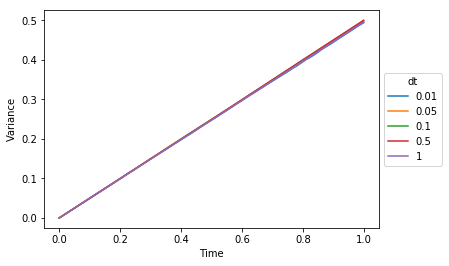

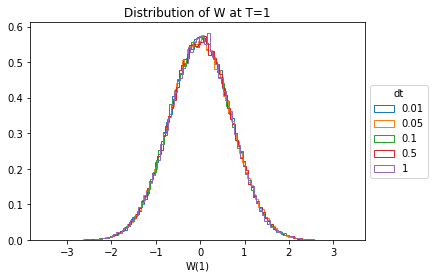

In [8]:
# plot variance over time
plt.figure()
for dt in dts:
    N = int(np.round(T/dt))
    trange = np.arange(N+1)*dt
    var = np.var(data[dt], axis=0)
    plt.plot(trange, var, label=dt)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="dt")
plt.xlabel("Time")
plt.ylabel("Variance")
    
plt.figure()
for dt in dts:
    plt.hist(data[dt][:, -1], bins=100, density=True, histtype="step", label=str(dt))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="dt")
plt.title("Distribution of W at T=1")
plt.xlabel("W(1)")

## A Note of Caution

If we naively used $W_{t+\Delta t} = W_t + \Delta t\tilde{v}_t$ where $\tilde{v}_t\sim\mathcal{N}(0, 1)$, then the rate of variance growth over time is linear with $\Delta t$.

Text(0.5,0,'W(1)')

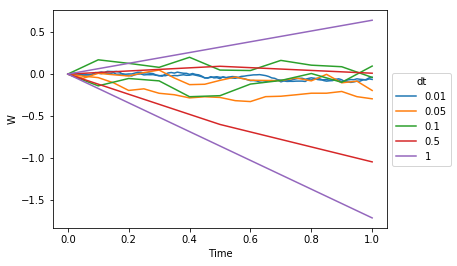

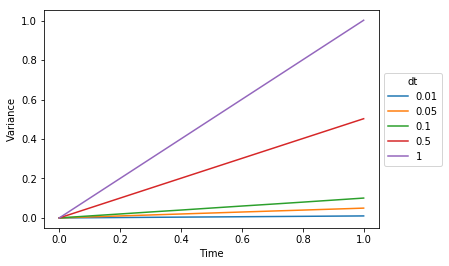

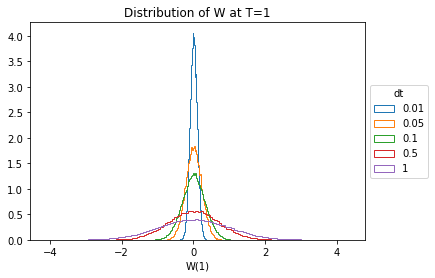

In [5]:
for dt in dts:
    N = int(np.round(T/dt))
    dW = np.random.randn(runs, N)*dt
    W = np.zeros((runs, N+1))
    W[:, 1:] = np.cumsum(dW, axis=1)
    data[dt] = W

# plot trajectories
plt.figure()
N_PLOT = 2
for dt in dts:
    N = int(np.round(T/dt))
    trange = np.arange(N+1)*dt
    color = plt.plot(trange, data[dt][0, :], label=dt)[0].get_color()
    for plt_idx in range(N_PLOT)[1:]:
        plt.plot(trange, data[dt][plt_idx+1, :], color=color)
plt.xlabel("Time")
plt.ylabel("W")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="dt")

# plot variance over time
plt.figure()
for dt in dts:
    N = int(np.round(T/dt))
    trange = np.arange(N+1)*dt
    var = np.var(data[dt], axis=0)
    plt.plot(trange, var, label=dt)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="dt")
plt.xlabel("Time")
plt.ylabel("Variance")
    
plt.figure()
for dt in dts:
    plt.hist(data[dt][:, -1], bins=100, density=True, histtype="step", label=str(dt))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="dt")
plt.title("Distribution of W at T=1")
plt.xlabel("W(1)")